<h1>Fetch Data Science &amp; Analytics (DSA) – Python Coding Challenge</h1>
<br><br>
<b>Problem Statement</b><br>
In Python build a scraper that manipulates the associated text document (the first
chapter of the book Frankenstein) to do the following:<br>
● Store all distinct words in the text in a dictionary and keep track of the word
counts (make sure to strip all punctuation and lower the case of the words)<br>
● There are 4 sentences in this text, composed of words that are “hidden”
(bookended by special characters). Find the sentences in the text.<br>
● Save the distinct word dictionary as a JSON file (call it &#39;word_count_dict.json&#39;)<br>
● Save the 4 hidden sentences together as a list of lists, then join them and print
them with a for loop<br>
● Remove the 4 hidden sentences from the original text file and save a clean
version of the first chapter of Frankenstein to a text file (call it
&#39;Clean_Frankenstein.txt&#39;)<br>
● Plot a histogram of the count of words by word length for all words in the
document<br>

In [1]:
from utils import read_text, save_json, save_text, tokenize, remove_punctuations
import re
import matplotlib.pyplot as plt

# read text from text file
text = read_text('data.txt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anupamtripathi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<h3>Task 1, 3</h3>
● Store all distinct words in the text in a dictionary and keep track of the word counts (make sure to strip all punctuation and lower the case of the words)<br>
● Save the distinct word dictionary as a JSON file (call it 'word_count_dict.json'

In [2]:
def get_word_counts(filename):
    with open(filename, 'r', encoding='utf8') as f:
        x = f.read()

    x = x.lower()
    x = re.sub(r'[^\w\d\s]+', '', x)
    x = x.replace('\n', ' ')
    x = x.split(' ')
    word_count = {}
    for word in x:
        if word not in word_count:
            word_count[word] = 1
        else:
            word_count[word] += 1

    return word_count, x

# get word count from the file
word_counts, words = get_word_counts('data.txt')
save_json(word_counts)

<h3>Task 2, 4, 5</h3>
● There are 4 sentences in this text, composed of words that are “hidden” (bookended by special characters). Find the sentences in the text.<br>
● Save the 4 hidden sentences together as a list of lists, then join them and print them with a for loop<br>
● Remove the 4 hidden sentences from the original text file and save a clean version of the first chapter of Frankenstein to a text file (call it 'Clean_Frankenstein.txt')

In [3]:
def remove_hidden_sentences(text):
    removed_hidden = []
    hidden_sent = []
    for sent in text:
        regex = r'^.*([^\w\d\s])[^\s]*\1.*$'
        if not (re.search(regex, sent)):
            removed_hidden.append(sent)
        else:
            hidden_sent.append(sent)

    return removed_hidden, hidden_sent

sentences = tokenize(text)
sentences, hidden_sentences = remove_hidden_sentences(sentences)
save_text('Clean_Frankenstein.txt', sentences)

<h3>Task 2, 4, 5</h3>
● Plot a histogram of the count of words by word length for all words in the document

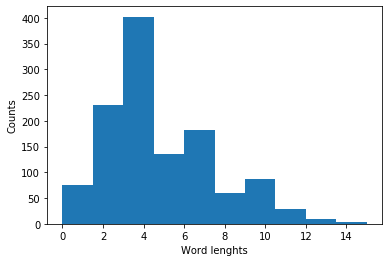

In [4]:
words_len = list(map(len, words))
plt.hist(words_len, density=False)
plt.xlabel('Word lenghts')
plt.ylabel('Counts')
plt.show()

Assumptions: <br>
● Even though the document mentions 4 hidden sentences, more than that qualify form the defincation of hidden sentence, therefore all have been removed. If for example 'end of sentence. <the< \n' is a part of the text, '<the< ' is the entire sentence that will be removed due to precence of hidden word.  
● The given text has been given with the code in form of a text file, so an explicit scrapper was not needed.

All the needed functions and aditional code is available on https://github.com/anupamtripathi7/fetch_rewards